# Inventory Management
In modern business environment, the company needs more significant efforts to reduce the operating cost and also increase customer satisfaction. Inventory has significant role to satisfy the customer demand hence, it becomes important asset for any organization.Therefore, it should be managed effectively and efficiently to minimize total cost and to satisfy the customer’s requirement. In any real condition, inventory management faces barriers in the form of a tradeoff between minimizing total cost and maximizing service level. Therefore, choosing the correct inventory policy that can be applied in industry now becomes essential to management.

## EOQ Policy

The simpliest Policy to answer the question “How much product should I order this time?”, is the EOQ model. This policy assumes a constant demand and ignores the lost sales costs. However, in the EOQ model the tradeoff between the fixed ordering cost (or, if you’re making the item, a fixed setup cost) and the inventory carrying cost is evaluated to calculate the optimal order quantity.

<b> 1. EOQ = Qo = √ ((2 * Annual Demand * setup cost)/holding cost) </b>
<br>
<b> 2. Order cycle = √(Qo / Annual Demand) * Total working days in a year </b>
<br>
<b> 3. Total Cost = (Qo* holding cost / 2) + (Annual demand * Setup cost)/Qo </b>


As a quick background, the EOQ model is meant to answer the question “How much product should I order this time?” That is, when you order (or make) a widget, should you order just one unit, a hundred units, a thousand units, or more? To answer that question, you need to understand the trade-off between the fixed ordering cost (or, if you’re making the item, a fixed setup cost) and the inventory carrying cost. If there is a relatively high fixed cost, you want many units in an order. If the inventory carrying cost is relatively high, you probably only want to order a few.

### EOQ  Model Example

Manufacturer’s demand = 120,000units/year  

Manufacturer’scosts:

1. Fixed Cost per shipment (ordering cost) = $500/shipment

2. Purchase cost = $1/unit

3. Cost of holding one unit in inventory for one year = $0.3

4. Selling Price = $7/unit

In [35]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
import operator

In [52]:
#Constant demand
d = 120000 #annual demand
S = 500 #ordering cost
h = 0.3 #holding cost
selling_price = 5
unit_cost = 1
optimal_quantity = math.sqrt((2*d*S)/h)
cycle_time = math.sqrt((2*S)/(h*d))
order_cycle = cycle_time *360 #Assuming total of 360 working days in a year


What is the buyer’s optimal order quantity?

In [49]:
optimal_quantity

20000.0

What is the ordering interval in days?

In [67]:
review_period_eoq = round(order_cycle,2)
review_period_eoq

60.0

### Simulation Model

The EOQ Quanty and cycle time is applied in a simulation that tries to replicate a market with uncertain demand.
We assume that the review period is 60 days and the order quantity of  20,000 units and a leadtime of 0 days is assumed. The inventory status is recorded in the simulation.

<b> Creating a function to simulate the daily demand</b>

In [ ]:
# Creating a function that allocates the demand  if there is a purchase


def daily_demand(mean, sd, probability):
    random_num = np.random.uniform(0, 1)              #chose a random number between 1 and 0
    if random_num > probability:                      #if number is more than probability then there is no sale
        return 0
    else:
        return np.random.normal(mean, sd)
    #demand follows a log-normal distribution using mean and sd of the previous year's demand.

In [ ]:
# Define Monte Carlo Simulation to replicate demand and inventory 

            
def eoq_monte_carlo(M,review_period,probability,mean,sd):
    
    stock_out = 0
    inventory = M
    
    # dictionary to store all the information
    data = {'inv_level': [], 'daily_demand': [], 'units_sold': [], 'units_lost': [], 'orders': []}

    for day in range(1, 360):
        day_demand = daily_demand(mean, sd, probability)
        day_demand = round(day_demand,0)
        
        #used to determine if there is a sale and what the demand would be
        data['daily_demand'].append(day_demand)
        if day % review_period == 0: 
            #check if the day to place order
            q = M # quantity to be ordered
            data['orders'].append(round(q,0))
            # update inventory when product has been received from manufacturer
            inventory += q
            
        inv_gap = inventory - day_demand
        
        if inv_gap >= 0: #check if inventory is enough to satisfy demand
            data['units_sold'].append(day_demand)
            inventory -= day_demand #reduce inventory by daily demand
        else:
            data['units_sold'].append(round(inventory,0))
            lost_sales = day_demand - inventory
            data['units_lost'].append(round(lost_sales,0))
            inventory = 0
            stock_out += 1

        data['inv_level'].append(round(inventory,0))

    return data

In [128]:
#function to total cost
def calculate_cost(data,days,unit_cost,holding_cost,order_cost):

    Co = len(data['orders']) * order_cost
    Ch = sum(data['inv_level']) * holding_cost * (1 / days)
    cost = sum(data['orders']) * unit_cost

    cost =  cost + Co + Ch

    return cost

In [173]:
#function to calculate profit
def calculate_profit(data,days,unit_cost,holding_cost,order_cost,selling_p):

    revenue = sum(data['units_sold']) * selling_price
    Co = len(data['orders']) * order_cost
    Ch = sum(data['inv_level']) * holding_cost * size * (1 / days)
    cost = sum(data['orders']) * unit_cost

    profit = revenue - cost - Co - Ch

    return profit[0]

### Application of EOQ Model on constant demand

This scenario assumes no uncertainty therefore a constant demand and a purchase probability of 1. Therefore the demand standard deviation is assumed to be zero and the EOQ quantity and review period is used.
 

In [129]:
#df1 = eoq_monte_carlo(20000,60,prob, mean_demand,std_demand)
df = eoq_monte_carlo(M = 20000,review_period=60,probability=1,mean=333.3,sd=0)


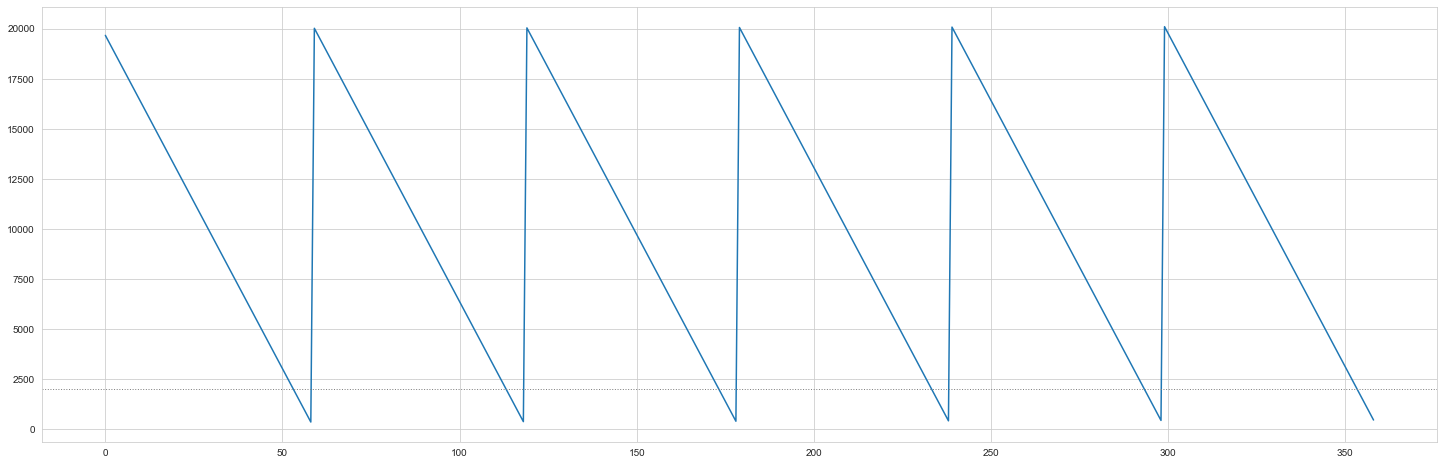

In [130]:
plt.figure(figsize=(25,8))
plt.plot(df['inv_level'])
plt.axhline(2000, linewidth=1, color="grey", linestyle=":")
plt.show()

In [132]:
cost = calculate_cost(df,days=360,unit_cost=1,holding_cost=0.3,order_cost=500)
cost

105551.28333333334

### Sceanario 1: Applying EOQ model to an uncertain demand

 The scenario below assumes that uncertainty in demand for a product any given day and uncertainty in the quantity of products demanded. 

1. Probability of demand in a given day = 0.9

2. Mean Daily Demand = 333.3

3. Standard deviation of Daily Demand  = 20 

4. Leadtime = 0


In [134]:
prob = 0.90 #probability of demand
mean_demand = 333.3
std_demand = 20
inventory = optimal_quantity #staring with EOQ

In [135]:
df2 = eoq_monte_carlo(M = 20000,review_period=60,probability=0.9,mean=333.3,sd=20)

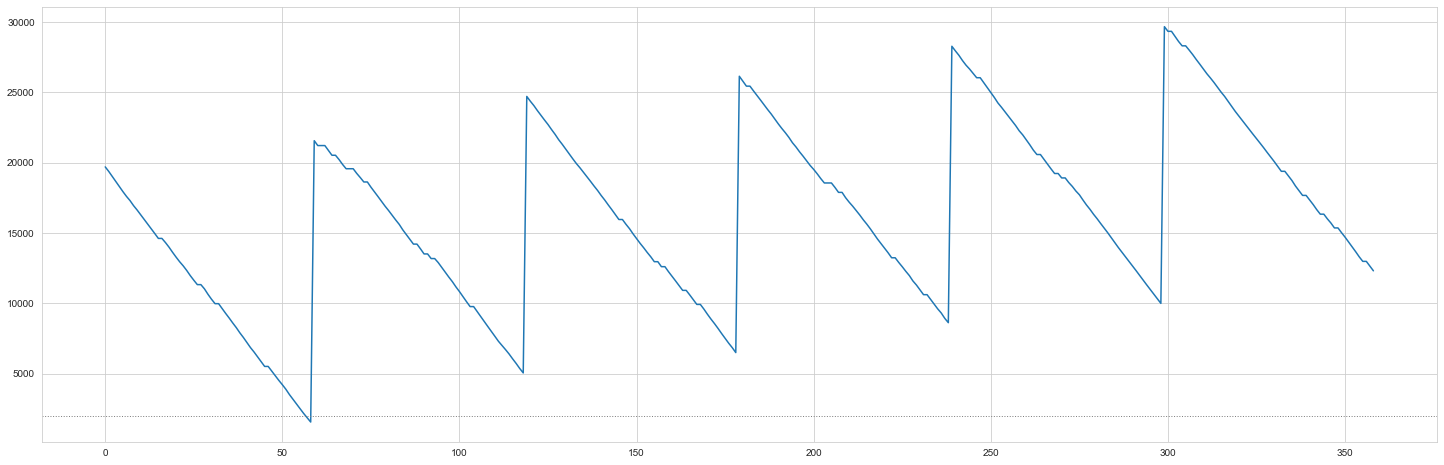

In [136]:
plt.figure(figsize=(25,8))
plt.plot(df2['inv_level'])
plt.axhline(2000, linewidth=1, color="grey", linestyle=":")
plt.show()


In [147]:
cost2 = calculate_cost(df2,days=360,unit_cost=1,holding_cost=0.3,order_cost=500)
cost2

107359.66083333333

In [174]:
revenue2 = calculate_profit(df2,days=360,unit_cost=1,holding_cost=0.3,order_cost=500,selling_p=7)
revenue2

1628699.9933250002

The uncertainty in demand has caused an increase in costs due to increase in the cycle inventory.

### Sceanario 2:  Continous Review model

In order to combact the holding costs that can accumulate due to demand uncertainty, the reorder point is determined by the inventory level. This policy is called the continous review model.

We set the reorder point at when inventory level is at 0.

In [166]:

def cc_monte_carlo(M,r,probability,mean,sd):

    inventory = M

    order_placed = False
    order_time = 0
    stock_out = 0
    # dictionary to store all the information
    data = {'inv_level': [], 'daily_demand': [], 'units_sold': [], 'units_lost': [], 'orders': []}

    
    for day in range(1, 365):
        day_demand = daily_demand(mean, sd, probability)
        day_demand = round(day_demand,0)
        
        #used to determine if there is a sale and what the demand would be
        data['daily_demand'].append(day_demand)
        if inventory <= r :
            # Time to place an order
            
            inventory += M
            data['orders'].append(round(M,0))
            #increase inventory with order quantity
            
        
        inv_gap = inventory - day_demand
        
        if inv_gap >= 0: #check if inventory is enough to satisfy demand
            data['units_sold'].append(day_demand)
            inventory -= day_demand #reduce inventory by daily demand
        else:
            data['units_sold'].append(round(inventory,0))
            lost_sales = day_demand - inventory
            data['units_lost'].append(round(lost_sales,0))
            inventory = 0
            stock_out += 1

        data['inv_level'].append(round(inventory,0))

    return data

In [167]:
df3=cc_monte_carlo(M=20000,r=0,probability=0.9,mean=333.3,sd=20)

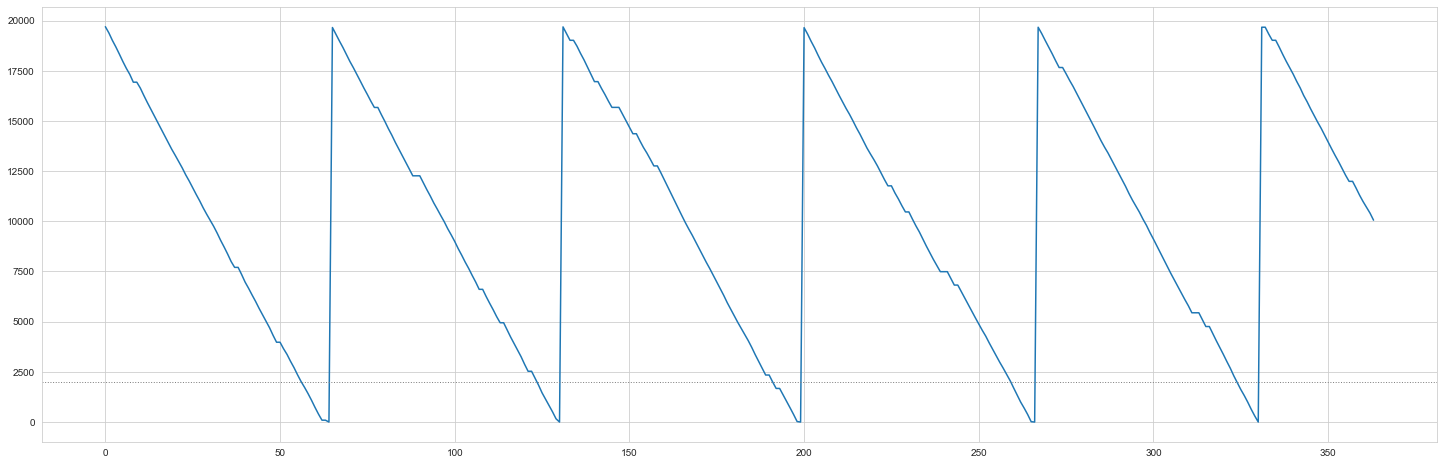

In [168]:
plt.figure(figsize=(25,8))
plt.plot(df3['inv_level'])
plt.axhline(2000, linewidth=1, color="grey", linestyle=":")
plt.show()

In [169]:
cost3 = calculate_cost(df3,days=360,unit_cost=1,holding_cost=0.3,order_cost=500)
cost3

105592.545

In [175]:
revenue3 = calculate_profit(df3,days=360,unit_cost=1,holding_cost=0.3,order_cost=500,selling_p=7)
revenue3

1665835.64935

The costs using this model is slightly lower than that of the EOQ model, and consequently the expected profits from the continous review model is higher than the EOQ model.

### Sceanario 3: Periodic Review model

Another policy to consider is the periodic review policy. Here the reorder point is the same as the EOQ model, however, the quantity ordered is varied according to the maximum order point. The order up-to quantity M is 20,000.

In [161]:
# Define Monte Carlo Simulation to imitate a periodic review model 

            
def pr_monte_carlo(M,review_period,probability,mean,sd):
    inventory = M
    q = 0
    stock_out = 0
    order_placed = False
    # dictionary to store all the information
    data = {'inv_level': [], 'daily_demand': [], 'units_sold': [], 'units_lost': [], 'orders': []}

    for day in range(1, 365):
        day_demand = daily_demand(mean, sd, probability)
        day_demand = round(day_demand,0)
        
        #used to determine if there is a sale and what the demand would be
        data['daily_demand'].append(day_demand)
        if day % review_period == 0: 
            #check if the day to place order
            q = M - inventory # quantity to be ordered
            data['orders'].append(round(q,0))
            # update inventory when product has been received from manufacturer
            inventory += q
            
        inv_gap = inventory - day_demand
        
        if inv_gap >= 0: #check if inventory is enough to satisfy demand
            data['units_sold'].append(day_demand)
            inventory -= day_demand #reduce inventory by daily demand
        else:
            data['units_sold'].append(round(inventory,0))
            lost_sales = day_demand - inventory
            data['units_lost'].append(round(lost_sales,0))
            inventory = 0
            stock_out += 1

        data['inv_level'].append(round(inventory,0))

    return data

In [162]:
df4 = pr_monte_carlo(M = 20000,review_period=60,probability=0.9,mean=333.3,sd=20)

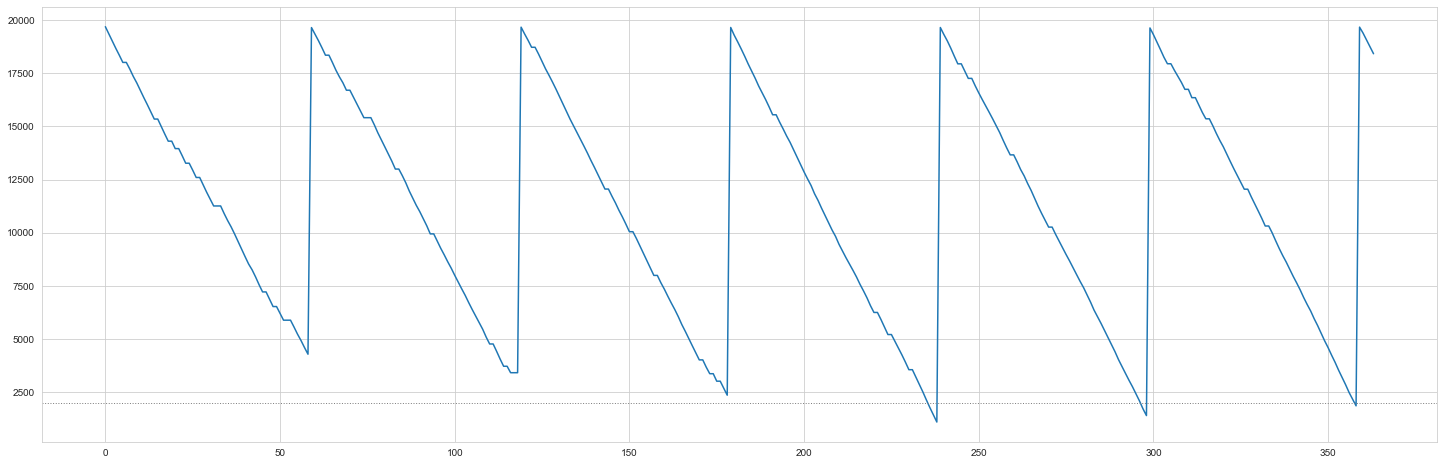

In [163]:
plt.figure(figsize=(25,8))
plt.plot(df4['inv_level'])
plt.axhline(2000, linewidth=1, color="grey", linestyle=":")
plt.show()

In [164]:
cost4 = calculate_cost(df4,days=360,unit_cost=1,holding_cost=0.3,order_cost=500)
cost4

112017.3925

In [176]:
revenue4 = calculate_profit(df4,days=360,unit_cost=1,holding_cost=0.3,order_cost=500,selling_p=7)
revenue4

1615675.1662750002

In [180]:
summ_table =  pd.DataFrame({'EOQ': [cost2, revenue2],'Continous Review':[cost3,revenue3],'Periodic Review':[cost4,revenue4]})
idx = ['Costs', 'Revenue']
summ_table = summ_table.set_index(pd.Index(idx))
summ_table

,EOQ,Continous Review,Periodic Review
Costs,1.073597e+05,1.055925e+05,1.120174e+05
Revenue,1.628700e+06,1.665836e+06,1.615675e+06


## Final Conclusion

As seen from the tables above we can see in this case the Continuous Review policy outperforms the Periodic Review policy and the EOQ model in terms of the expected profits for each product and proportion of lost orders.

However, both the continuous and periodic review policy have their advantages. Periodic review policy has a fixed review period which allows the organization to better forecasts the orders made over a period of time. Whereas the continuous review policy keeps the order size constant and gives flexibility in terms of the times to place the order. 

The expected profits is dependent on different costs (holding, ordering and other costs) that are different for every product and organization. The right inventory management model depends on the impact of these cost and and the demand distribution of the product.

### [GitHub Link](https://github.com/Master-of-Business-Analytics/Code_repository/tree/master/Inventory%20managment)
All of the graphs and code can be found in the MBAN GitHub repository, feel free to download it and modify the numbers for your use case.




## References
[1] Anderson, Sweeney, Williams, Camm, Cochran, Fry, Ohlmann. An Introduction to Management Science: Quantitative approaches to Decision Making. 14th Edition, 2015. Cengage Learning. pp. 457–478.

[2] Nagpurkar, M. (2020, April 2). Inventory Management using Python. Retrieved June 3, 2020, from https://towardsdatascience.com/inventory-management-using-python-17cb7ddf9314